In [1]:
from dypac import dypac
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
epi_filename = adhd_dataset.func[0]


Dataset created in /home/pbellec/nilearn_data/adhd



Downloaded 3072 of 3072 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)
Extracting data from /home/pbellec/nilearn_data/adhd/74a52d3552145e11365bb68453d1a70c/adhd40_metadata.tgz..... done.
/home/pbellec/git/nilearn/nilearn/datasets/func.py:509: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Downloaded 44414948 of 44414948 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)
Extracting data from /home/pbellec/nilearn_data/adhd/26dc434877313cabfa02a4e93691edaf/adhd40_0010042.tgz..... done.


In [147]:
model = dypac(n_clusters=10, n_states=3, verbose=1, n_init=1, n_init_aggregation=1, n_replications=100, 
                      detrend=True, smoothing_fwhm=5, standardize=True)
stab_maps = model.fit(epi_filename)

[MultiNiftiMasker.fit] Loading data from [/home/pbellec/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[dypac] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


  0%|          | 0/100 [00:00<?, ?it/s]

[dypac] Replicating clustering


100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


[dypac] Finding parcellation states
[dypac] Generating state stability maps


/home/pbellec/git/nilearn/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



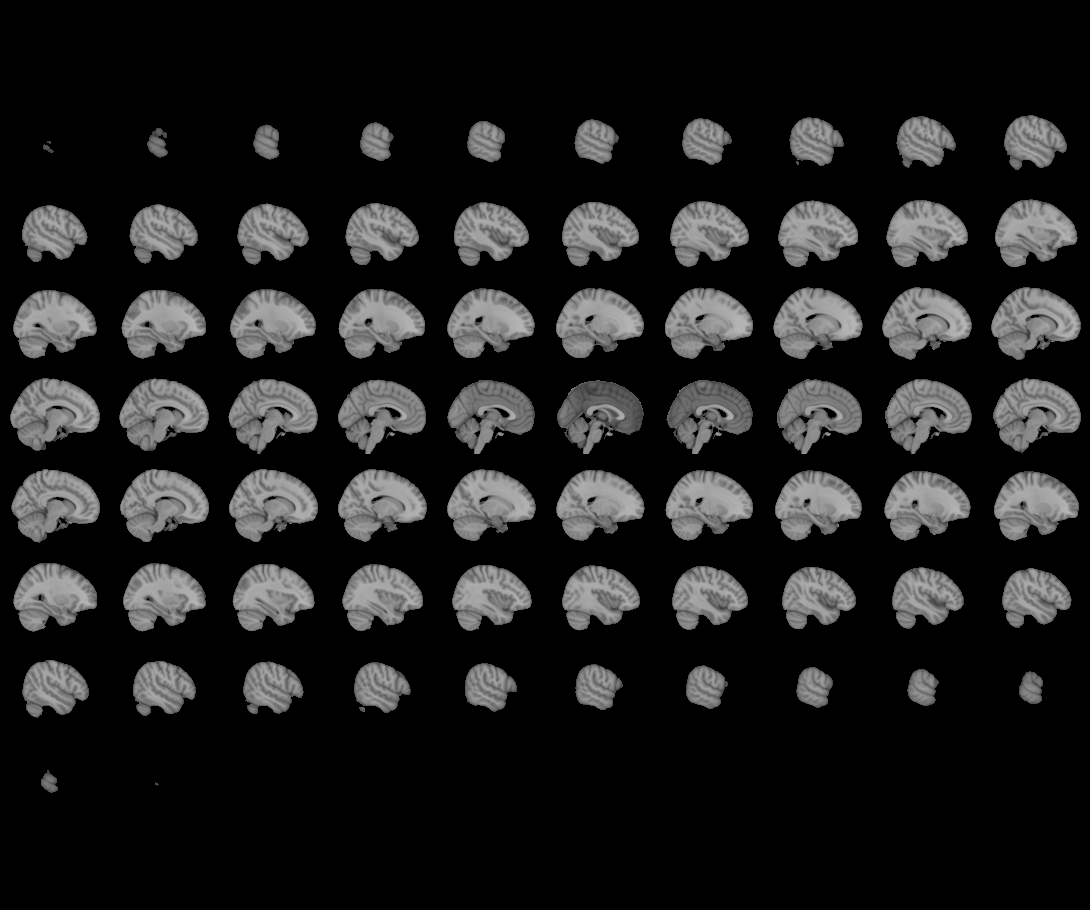
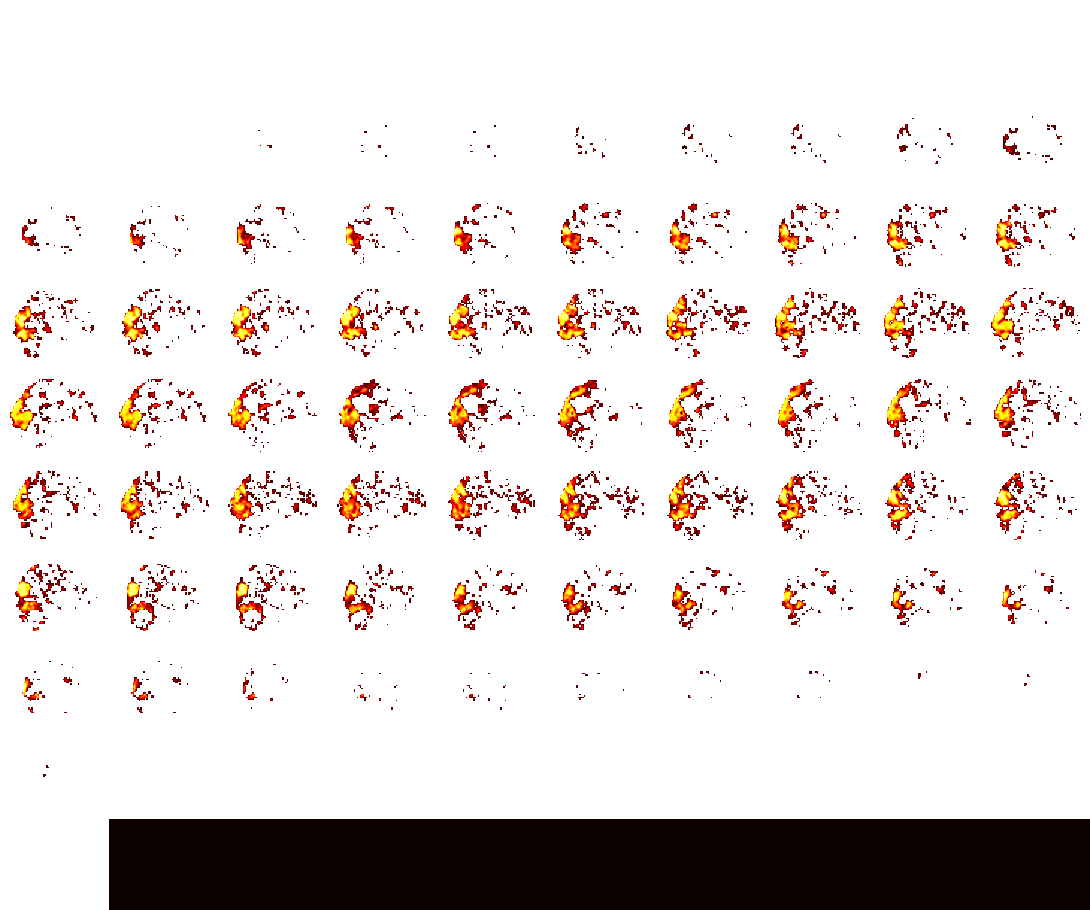

In [156]:
num_comp = 8
comp = model.masker_.inverse_transform(model.components_[num_comp,:])
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

In [157]:
masker = NiftiMasker(detrend=True, smoothing_fwhm=5, standardize=True)
masker.fit(epi_filename)
tseries = masker.transform(epi_filename)

In [158]:
img = [masker.inverse_transform(tseries)]

In [159]:
data = model.transform(img)

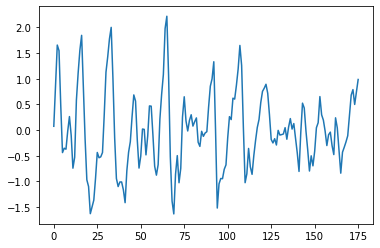

In [160]:
plt.plot(data[0][:,8])

In [161]:
img_r = model.inverse_transform(data)

/home/pbellec/git/nilearn/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



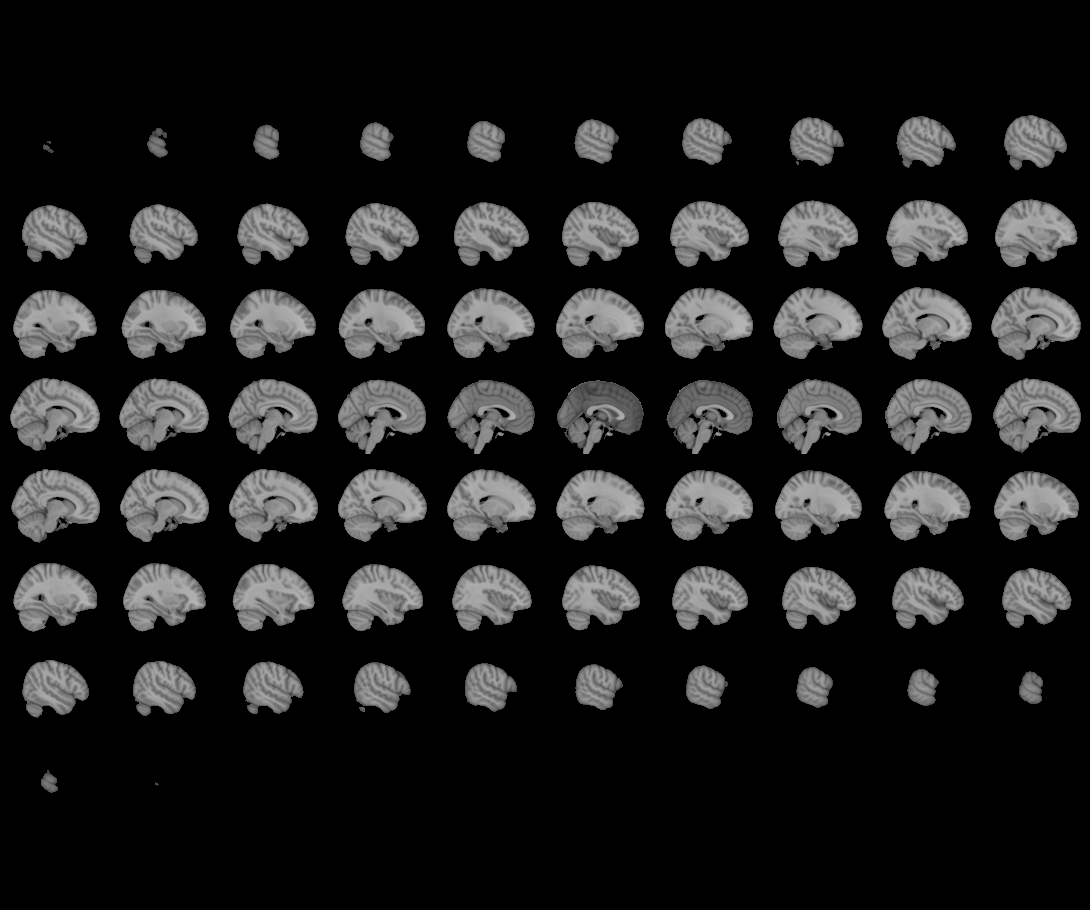
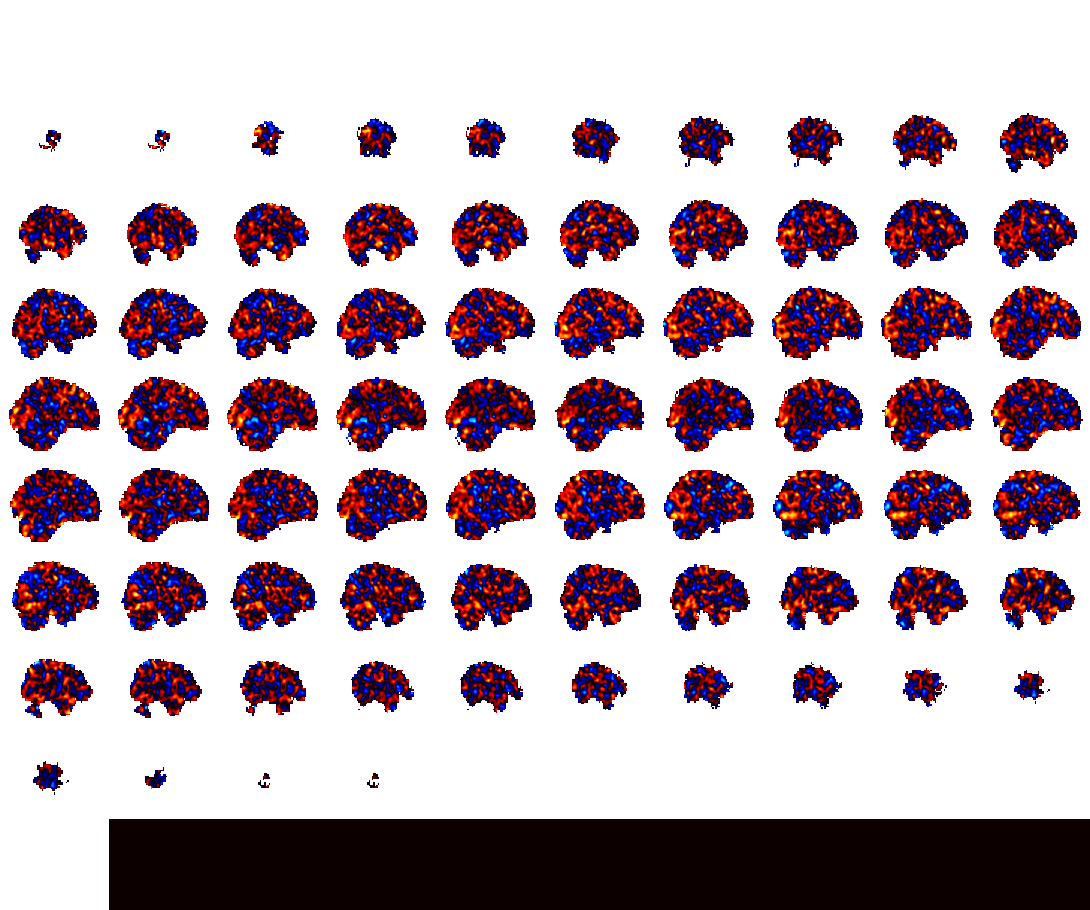

In [194]:
num_t = 15
plotting.view_img(image.index_img(img[0], [num_t]), cut_coords=[2, -22, 10], vmax=4)

/home/pbellec/git/nilearn/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



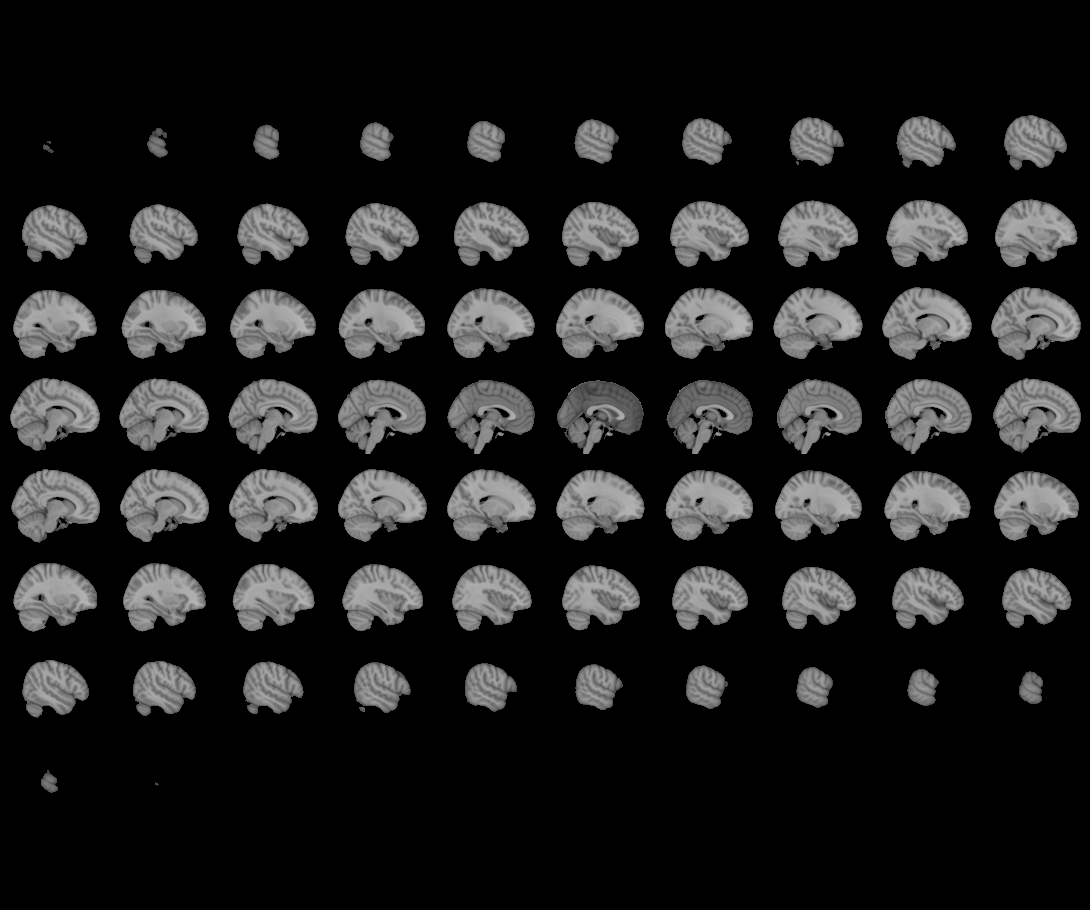
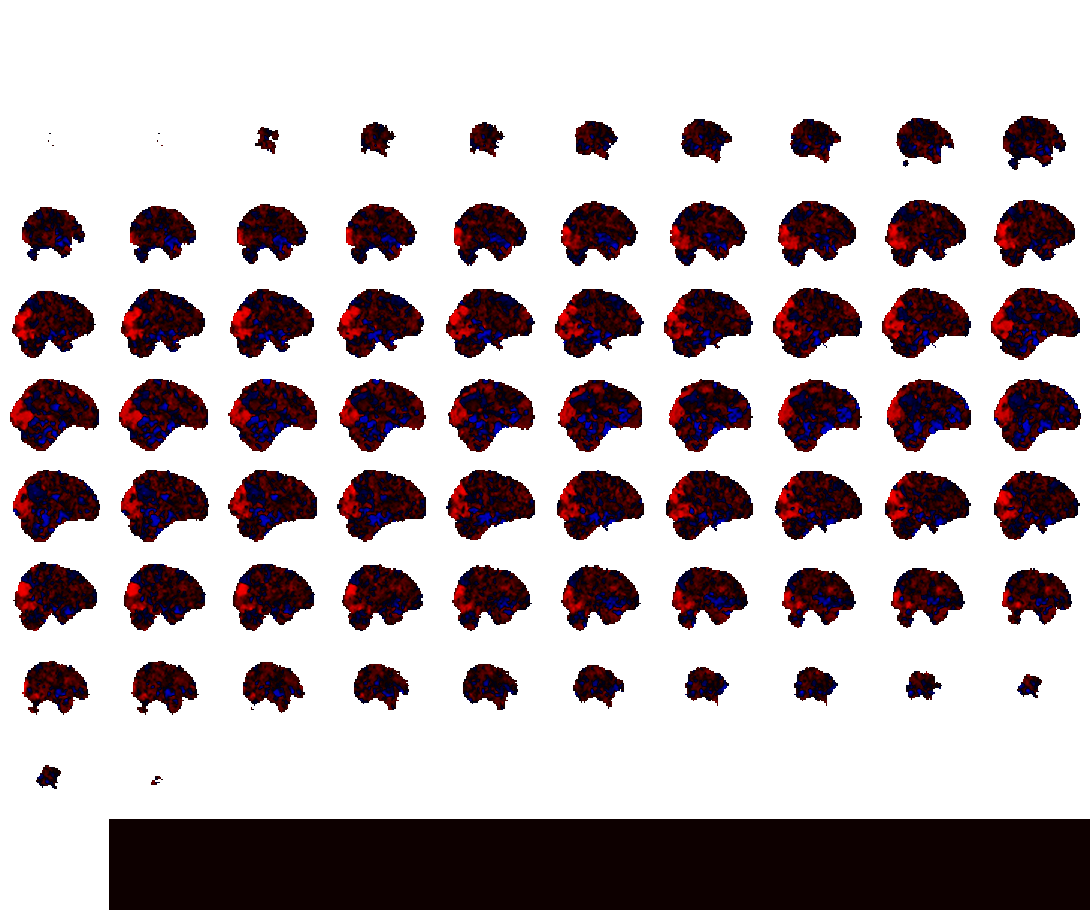

In [195]:
plotting.view_img(image.index_img(img_r[0],[num_t]), cut_coords=[2, -22, 10], vmax=4)

In [110]:
image.index_img?